# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_05_003
## Нелінійна фільтрація. Медіанний фільтр (біполярна завада)

In [6]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
from numpy.random import Generator, MT19937
plt.rcParams['font.size'] = 10

In [7]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_im = io.imread(path+filename)
## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
## rows_num = len(test_im)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
bins_flt = np.float32(bins) ## кількість рівнів яскравості в форматі float
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (512, 512, 3) IMAGE SIZE 786432
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256


####  Біполярна імпульсна завада **"СІЛЬ / ПЕРЕЦЬ"**

In [8]:
rg = Generator(MT19937(12345))
impuls_num = 512  # кількість завад / 2
test_im_noise = test_im.copy()
for i in range(1,impuls_num):
    i_n = np.int32(rg.random()*(rows_num-1)); j_n = np.int32(rg.random()*(clms_num-1))
                      
    test_im_noise[i_n,j_n,:] = 0   
    test_im_noise[i_n+1,j_n+1,:] = 255
    test_im_noise[i_n-1,j_n-1,:] = 255 
    test_im_noise[i_n+1,j_n-1,:] = 255
    test_im_noise[i_n-1,j_n+1,:] = 255 
    #test_im_noise[i_n,j_n+1,:] = 255
    #test_im_noise[i_n,j_n-1,:] = 255 
    #test_im_noise[i_n+1,j_n,:] = 255
    #test_im_noise[i_n-1,j_n,:] = 255 


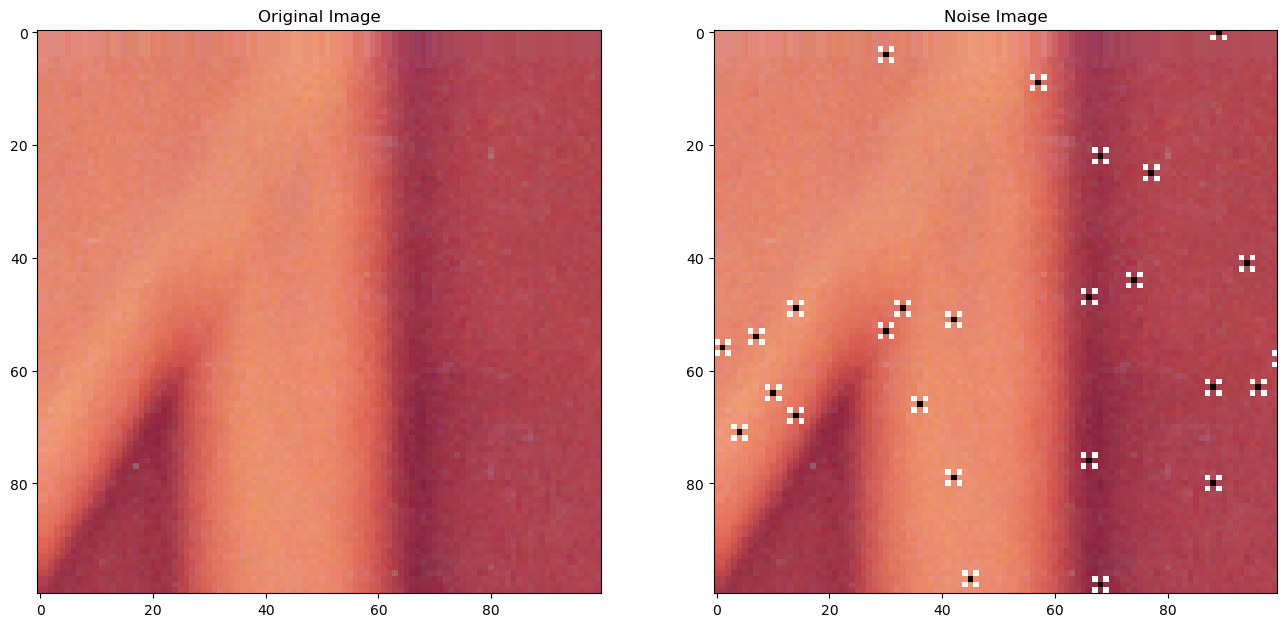

In [9]:
## Вивід оррігінального зображення  та зображення з шумомо 
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im[0:100,0:100,:])
ax[0].set_title("Original Image")
ax[1].imshow(test_im_noise[0:100,0:100,:])
ax[1].set_title("Noise Image")
plt.show()

####  Лініний усередняючий фільтр розмиття (BOX filter)

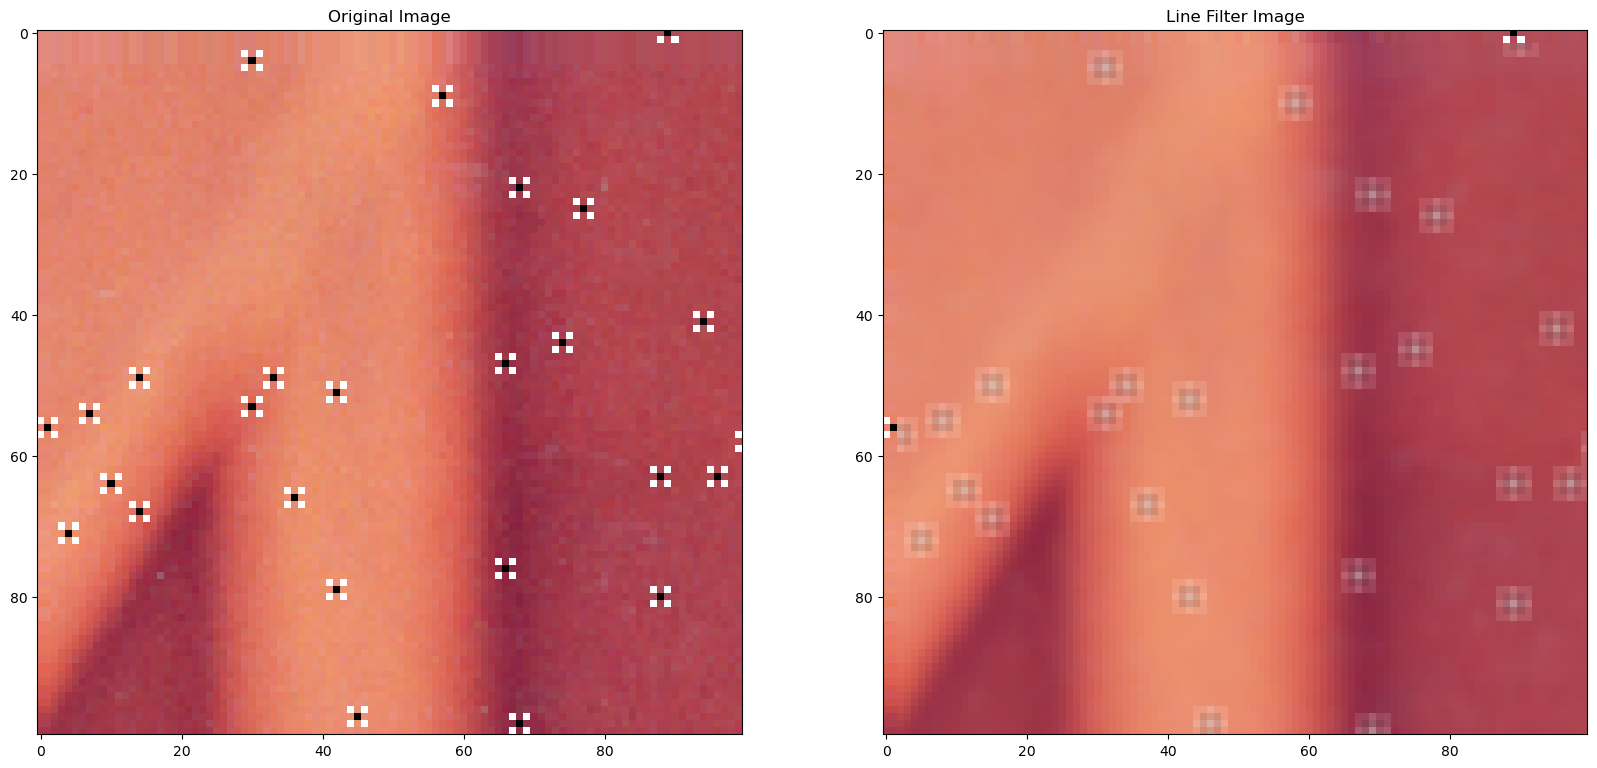

In [10]:
## Визначення параметрів маски
L = 3 ; mask_row = L ; mask_clm = L
## Визначення файлу перетвореного зображення
filtr_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint32)

for i in  range (2, (rows_num-2), 1):
    for j in  range (2, (clms_num-2), 1):
        filtr_im [i, j, :] = 0
        for l in range (mask_row):
            for k in range (mask_clm):
                filtr_im [i, j, :] += test_im_noise [i-(2-k), j-(2-l), :]
        filtr_im [i, j, :] = np.uint8(filtr_im [i, j, :]/9)

        
# Відновлюємо крайні строки та ствпці зображення
for i in  (0,1,rows_num - 2 , rows_num -1):
    for j in  range (0, clms_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im [i,j,:]= test_im_noise[i,j,:]
for j in  (0,1,clms_num - 2 , clms_num -1):
    for i in  range (0, rows_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im [i,j,:]= test_im_noise[i,j,:]
             


####  Стандартний медіанний фільтр

In [12]:
# МАСКА МЕДІАННОГО ФИЛЬТРУ (ХРЕСТ 3 х 3)
mask_row = 3
mask_clm = 3

## Визначення файлу перетворенного зображення
filtr_im_noise = np.zeros ( (rows_num, clms_num, 3), dtype = np.uint8)

# Масив пікселей для сортування та визначення медіани
pixels = np.zeros((5, 3), dtype=np.uint8) 
# Масив пікселей із значанням медіани (кольори)
pix    = np.zeros(3, dtype=np.uint8) # ПИКСЕЛЕЙ С ЗНАЧЕНИЕМ МЕДИАНЫ

for i in  range (1, (rows_num -1), 1):
    for j in  range (1, (clms_num-1), 1):
        # Обираємоо пікселі вікна "ХРЕСТ"
        pixels[0,:] =  filtr_im [i,j,:]
        pixels[1,:] =  filtr_im [i-1,j,:]
        pixels[2,:] =  filtr_im [i+1,j,:]
        pixels[3,:] =  filtr_im [i,j-1,:]
        pixels[4,:] =  filtr_im [i,j+1,:]

        # Визначаємо медіани R,G,B
        pix[0] = np.median(pixels[:,0])
        pix[1] = np.median(pixels[:,1])
        pix[2] = np.median(pixels[:,2])
        
        filtr_im_noise[i,j,:] = pix[:]

# Відновлюємо граничні ряки та совбці
for i in  (0,1,rows_num - 2 , rows_num -1):
    for j in  range (0, clms_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im_noise [i,j,:]= test_im_noise[i,j,:]
for j in  (0,1,clms_num - 2 , clms_num -1):
    for i in  range (0, rows_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im_noise [i,j,:]= test_im_noise[i,j,:]

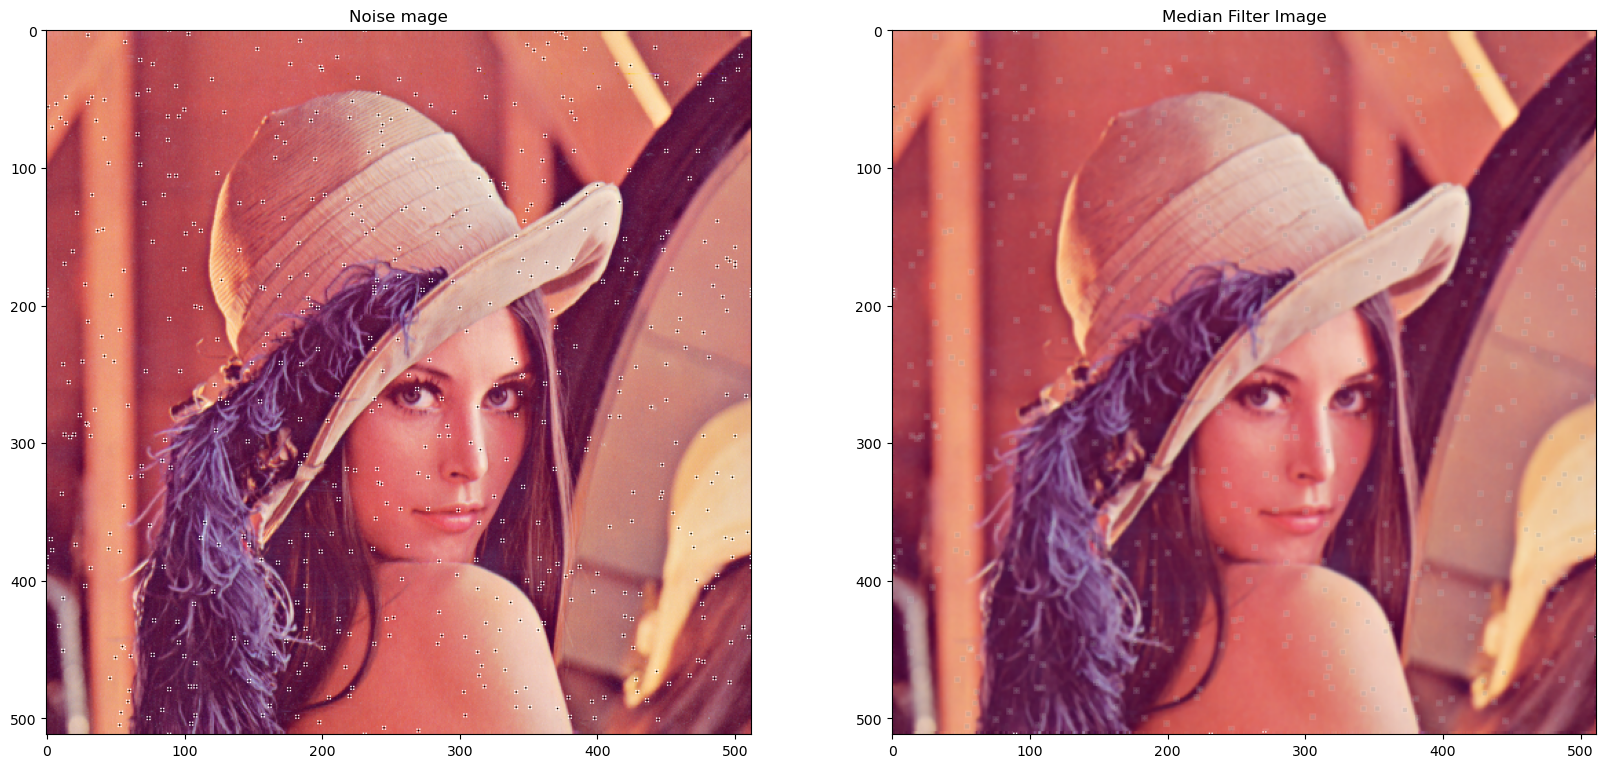

In [13]:
## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНОГО ЗОБРАЖЕННЯ
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
ax = axes.ravel()
ax[0].imshow(test_im_noise)
ax[0].set_title("Noise mage")
ax[1].imshow(filtr_im_noise)
ax[1].set_title("Median Filter Image")
plt.show()

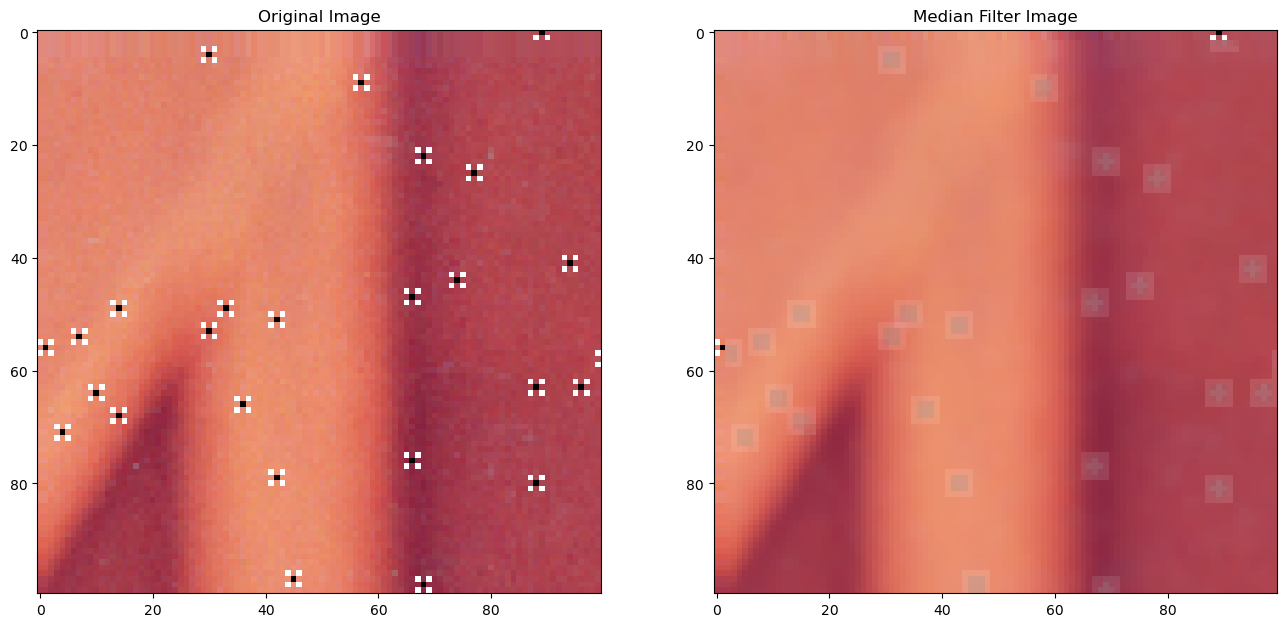

In [14]:
## Вивід ЗБІЛЬШЕНОЇ ЧАСТИНИ орігінального зображення  та зображення із завадами  
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im_noise[0:100,0:100,:])
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_noise[0:100,0:100,:])
ax[1].set_title("Median Filter Image")
plt.show()

####  Адаптивний медіанний фільтр

In [16]:
## МАСКА МЕДІАННОГО ФИЛЬТРА (ХРЕСТ 3 х 3)
mask_row = 3

## Визначення файлу перетворенного зображення
filtr_im_noise_ = np.zeros ( (rows_num, clms_num, 3), dtype = np.uint8)

pixels = np.zeros((5, 3), dtype=np.uint8) # Пікселі для сортування
#pix     = np.zeros(3, dtype=np.uint8) # піксель із значанням медіани
pix_med = np.zeros(3, dtype=np.uint8) # піксель із значанням медіани
pix_min = np.zeros(3, dtype=np.uint8) # піксель із мінімальним значанням 
pix_max = np.zeros(3, dtype=np.uint8) # піксель із максимальним значанням

for i in  range (1, (rows_num -1), 1):
    for j in  range (1, (clms_num-1), 1):
        pixels[0,:] = test_im_noise[i, j,   :]
        pixels[1,:] = test_im_noise[i-1,j,  :]
        pixels[2,:] = test_im_noise[i+1,j,  :]
        pixels[3,:] = test_im_noise[i  ,j-1,:]
        pixels[4,:] = test_im_noise[i  ,j+1,:]
        
        pix_med[0] = np.median(pixels[:,0]) ; pix_med[1] = np.median(pixels[:,1]); pix_med[2] = np.median(pixels[:,2])
        pix_min[0] = np.min   (pixels[:,0]) ; pix_min[1] = np.min   (pixels[:,1]); pix_min[2] = np.min   (pixels[:,2])
        pix_max[0] = np.max   (pixels[:,0]) ; pix_min[1] = np.max   (pixels[:,1]); pix_min[2] = np.max   (pixels[:,2])
        
        
        filtr_im_noise_[i,j,:] = test_im_noise [i,j, :]
        for q in range (0,3):
            if filtr_im_noise_[i,j,q] == pix_min[q] :  filtr_im_noise_[i,j,q] = pix_med[q] 
            if filtr_im_noise_[i,j,q] == pix_max[q] :  filtr_im_noise_[i,j,q] = pix_med[q] 

# Відновлюємо крайні строки та ствпці зображення
for i in  (0,1,rows_num - 2 , rows_num -1):
    for j in  range (0, clms_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im_noise_ [i,j,:]= test_im_noise[i,j,:]
for j in  (0,1,clms_num - 2 , clms_num -1):
    for i in  range (0, rows_num, 1):
        #filtr_im [i,j,:]=test_im[i, j,:]
        filtr_im_noise_ [i,j,:]= test_im_noise[i,j,:]


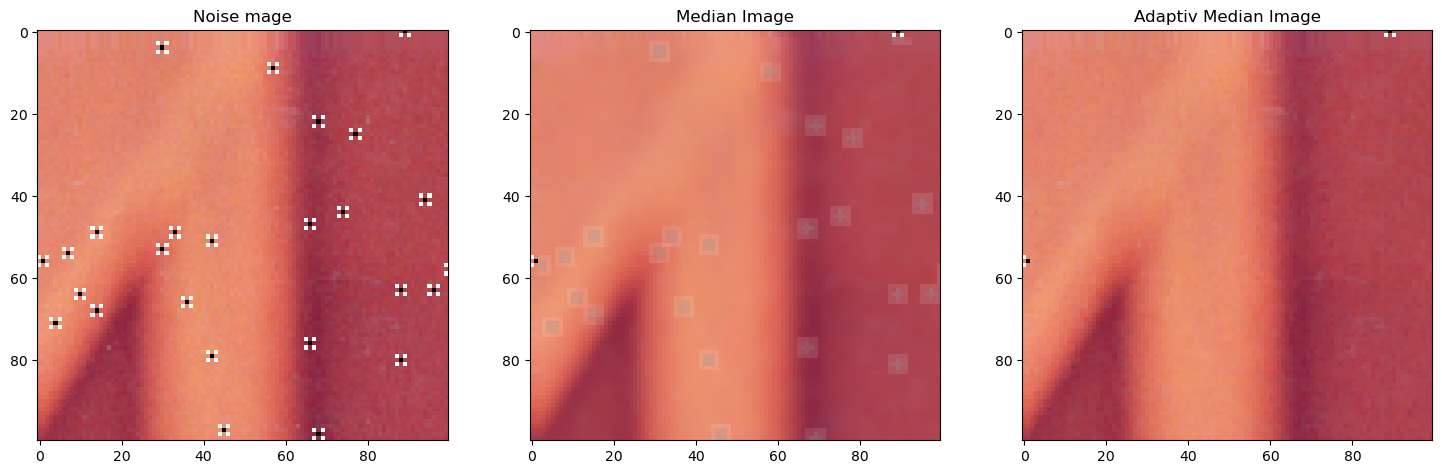

In [17]:
## СУМІСНИЙ ВИВІД ОРИГІНАЛЬНОГО ТА ПЕРЕТВОРЕНИХ ЗОБРАЖЕНЬ
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
ax = axes.ravel()
ax[0].imshow(test_im_noise[0:100,0:100,:])
ax[0].set_title("Noise mage")
ax[1].imshow(filtr_im_noise[0:100,0:100,:])
ax[1].set_title("Median Image")
ax[2].imshow(filtr_im_noise_[0:100,0:100,:])
ax[2].set_title("Adaptiv Median Image")

plt.show()

#### Побудова гістограмм

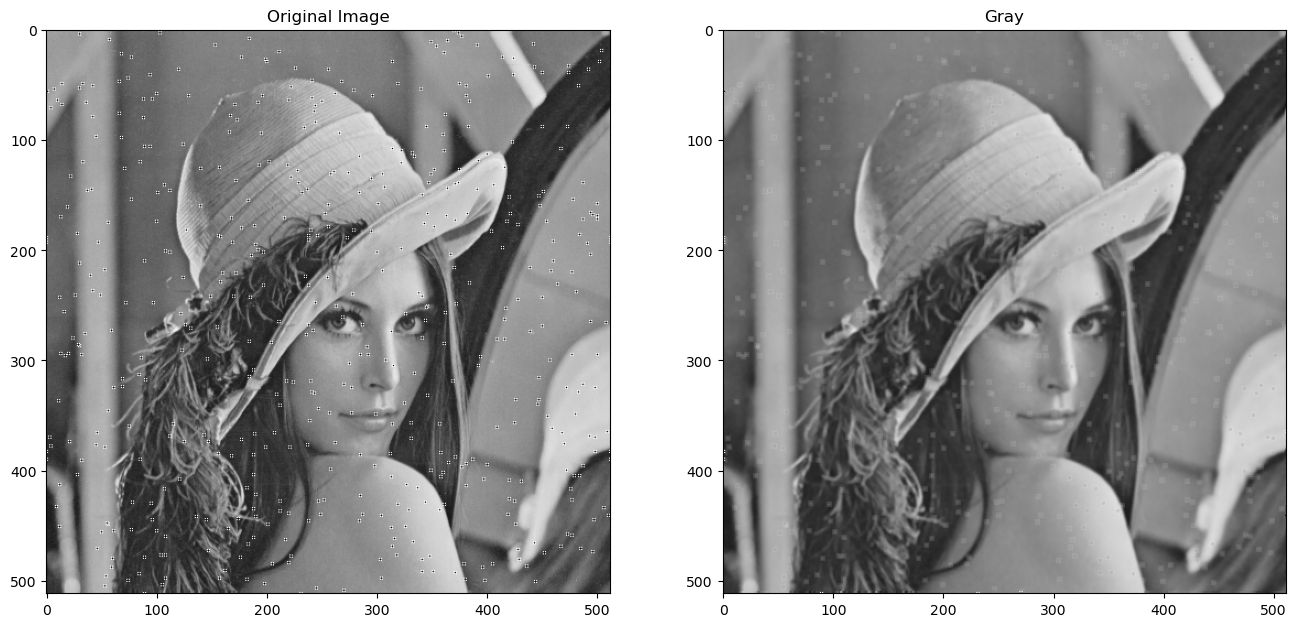

In [19]:
# Масиви для монохромних зображень
test_im_noise_gray = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32)
filtr_im_gray      = np.zeros ( (rows_num, clms_num, 3), dtype=np.float32)

# Формування монохромних зображень
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        test_im_noise_gray [i, j, :] = (0.299*test_im_noise [i, j, 0]+0.587*test_im_noise [i, j, 1]+0.114*test_im_noise [ i, j, 2])/256.0
        filtr_im_gray      [i, j, :] = (0.299*filtr_im_noise[i, j, 0]+0.587*filtr_im_noise[i, j, 1]+0.114*filtr_im_noise[ i, j, 2])/256.0       

## Відображаємо
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()
ax[0].imshow(test_im_noise_gray)
ax[0].set_title("Original Image")
ax[1].imshow(filtr_im_gray)
ax[1].set_title("Gray")
plt.show()


#### Порівняння гістограм

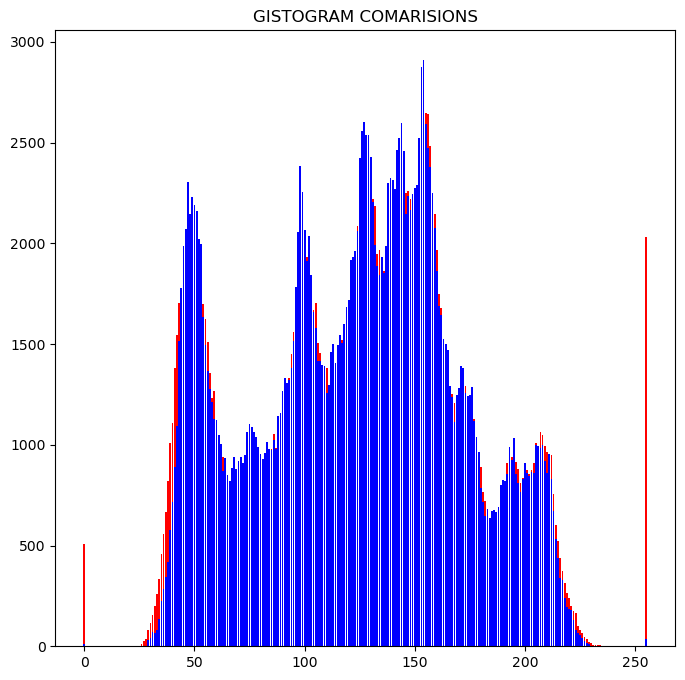

In [21]:
# Масиви для гістограм
L_gisto_noise = np.zeros ( (bins), dtype=np.uint32)
L_gisto_filtr = np.zeros ( (bins), dtype=np.uint32)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        L_gisto_noise [np.uint8(test_im_noise_gray[i, j, 0]*256)] += 1 
        L_gisto_filtr [np.uint8(filtr_im_gray[i, j, 0]*256)] += 1 
        
# Порівняння 
        
pix_index = np.arange(256) 
fig, ax = plt.subplots(figsize=(8,8))
plt.title('GISTOGRAM COMARISIONS')
ax.bar(pix_index, L_gisto_noise, color = 'red')
ax.bar(pix_index, L_gisto_filtr, color = 'blue')
plt.show()